In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean

In [30]:
def data (x, m):
    
    df = []
    for i in x:
        z = []
        for j in range (m):
            z.append (i**j)
        df.append (z)
        
    df = pd.DataFrame (df)
    return df

In [31]:
def find_weights (X, Y):
    
    rhs = np.matmul (X.T, Y)
    lhs = np.matmul (X.T, X)
    
    return np.matmul (np.linalg.inv (lhs), rhs)

In [43]:
def linear_regression (x, y, m):
    
    df = data (x, m)
    w = find_weights (df.values, y)
    
    val = np.linspace (0, 2*np.pi, 2)
    
    plt.plot(val, np.matmul (data (val, m).values, w), linestyle='solid', color=lighten_color('grey', 0.4))
    plt.scatter (x, y, color = "red")
    
    return w

In [44]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [45]:
x = np.linspace (0, 2*np.pi, 15)
y = np.sin (x)

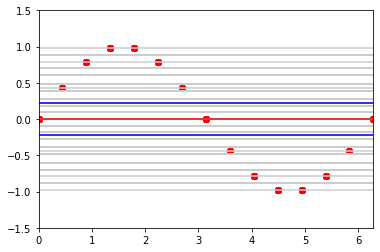

In [46]:
ww = []

for i in range (len (x)):
    for j in range (i+1, len (x)):
        
        x_t = [x [i], x [j]]
        y_t = [y [i], y [j]]
        w = linear_regression (x_t, y_t, 1)
        ww.append (w)
        
bias_var (ww, 1)

In [47]:

def bias_var (ww, o):
    # Find all the mean predicted values
    val = np.linspace (0, 2*np.pi, 100)

    p = []
    v = []
    for x in val:
        my = []
        vy = []
        for w in ww:
            my.append (np.matmul (data ([x], o).values, w) [0])
            vy.append (np.matmul (data ([x], o).values, w) [0])
        p.append (mean (my))
        v.append (np.var (vy))


    plt.xlim(0, 2*np.pi)
    plt.ylim(-3, 3)
    v1 = []
    v2 = []
    for i in range (len (v)):
        v1.append (p [i] + v [i])
        v2.append (p [i] - v [i])

    plt.plot (val, p, color = "red")
    plt.plot (val, v1, color = "blue")
    plt.plot (val, v2, color = "blue")


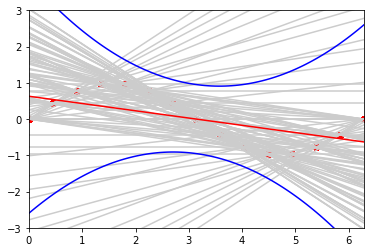

In [48]:
ww = []
for i in range (len (x)):
    for j in range (i+1, len (x)):
        
        x_t = [x [i], x [j]]
        y_t = [y [i], y [j]]
        w = linear_regression (x_t, y_t, 2)
        ww.append (w)
        
bias_var (ww, 2)